## How can we group the customer feedbacks.

TripAdvisor, Inc. is an American travel and restaurant website company that shows hotel and 
restaurant reviews, accommodation bookings and other travel-related content.It also includes 
interactive travel forums.

Headquartered in Needham, Massachusetts, TripAdvisor is the largest travel website in the 
world, with more than 315 million reviewers (active and inactive) and over 500 million reviews of 
hotels, restaurants, attractions and other travel-related businesses. TripAdvisor was an early 
adopter of user-generated content. The website services are free to users, who provide most of 
the content, and the website is supported by a hotel booking facility and an advertising business 
model.

This data set is populated by crawling TripAdvisor.com.

Reviews on destinations in 10 categories mentioned across East Asia are considered.

Each traveler rating is mapped as

- Excellent (4)
- Very Good (3)
- Average (2)
- Poor (1)
- Terrible (0)

And average rating is used against each category per user.

All of us that use Trip Advisor gets good advice on where we can eat, sleep, go on adventure etc. 
So you are helping others get a good experience around the world which is a great benefit! 
Besides that the feeling of knowing that you've help others is always nice, which is why I often 
review restaurants on Trip Advisor.


Now the company wants to use this data to undestand who are having similar reviews on the 
following categories. Can we help them?

## Attribute Information:
- **Attribute 1 :** Unique user id
- **Attribute 2 :** Average user feedback on art galleries
- **Attribute 3 :** Average user feedback on dance clubs
- **Attribute 4 :** Average user feedback on juice bars
- **Attribute 5 :** Average user feedback on restaurants
- **Attribute 6 :** Average user feedback on museums
- **Attribute 7 :** Average user feedback on resorts
- **Attribute 8 :** Average user feedback on parks/picnic spots
- **Attribute 9 :** Average user feedback on beaches
- **Attribute 10 :** Average user feedback on theaters
- **Attribute 11 :** Average user feedback on religious institutions

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading a csv file
df = pd.read_csv('tripadvisor_review.csv')

In [3]:
#Dimension of a dataframe
df.shape

(980, 11)

In [4]:
#First 10 rows of a dataframe
df.head(10)

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
5,User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66
6,User 7,0.90,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22
7,User 8,0.74,1.40,0.22,0.41,0.82,1.50,3.17,2.81,1.54,2.88
8,User 9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54
9,User 10,0.70,1.36,0.22,0.26,1.50,1.54,3.17,2.82,2.24,3.12


In [5]:
#Data types of all columns
df.dtypes

User ID         object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
dtype: object

In [6]:
#Checking for a missing values
df.isnull().sum()

User ID        0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

In [7]:
#Summary of a dataframe
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [8]:
#Extract the ratings
user = df['User ID']
sample = df.drop('User ID', axis=1).values
sample

array([[0.93, 1.8 , 2.29, ..., 2.79, 1.82, 2.42],
       [1.02, 2.2 , 2.66, ..., 2.63, 1.86, 2.32],
       [1.22, 0.8 , 0.54, ..., 2.8 , 1.31, 2.5 ],
       ...,
       [0.61, 1.32, 0.67, ..., 2.81, 1.34, 3.02],
       [0.93, 0.2 , 0.13, ..., 2.98, 1.12, 2.46],
       [0.93, 0.56, 1.13, ..., 2.87, 1.34, 2.4 ]])

Measure the quality of clusterings with different numbers of clusters using the inertia. For each of the given values of k, perform the following steps:

Create a KMeans instance called model with k clusters.

Fit the model to the review data samples.

Append the value of the inertia_ attribute of model to the list inertias.

In [9]:
#Implement K-Means
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(sample)
    inertia.append(kmeans.inertia_)

Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

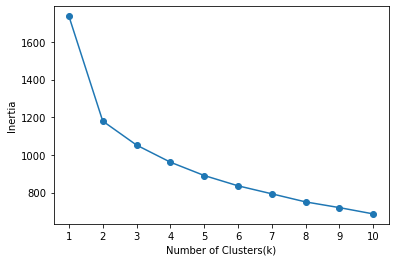

In [10]:
#Plot number of cluster(k) vs inertia
plt.plot(range(1, 11), inertia, '-o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

You can see from the graph that 3 is a good number of clusters, since these are points where the elbow begins

Now let us do the Kmeans with 3 clusters

In [11]:
#Implement K-Means with K=3
kmeans = KMeans(n_clusters=3)

In [12]:
#Derive the cluster labels
labels = kmeans.fit_predict(sample)

In [13]:
labels

array([1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2,
       1, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1,
       2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1, 2, 2, 0, 1,
       0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0,

In [14]:
#Create a dataframe to store user_id and its labels
df = pd.DataFrame({'User ID' : user,'labels' : labels})

In [15]:
df

,User ID,labels
0,User 1,1
1,User 2,1
2,User 3,0
3,User 4,0
4,User 5,2
...,...,...
975,User 976,0
976,User 977,0
977,User 978,2
978,User 979,0
